In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
from config import api_key
import time
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# URL to discover movies for the last year starting on 2017-09-01 and ending on 2018-09-01
base_url = "https://api.themoviedb.org/3/"
discover_url = base_url+"discover/movie?api_key="+ api_key + \
"&language=en-US&region=US&sort_by=release_date.desc&include_adult=false&include_video=false" \
"&release_date.gte=2017-09-01&release_date.lte=2018-08-31&page=" 

In [3]:
movie_list=[]
release_date=[]
sentiment_compound=[]
for page in range(1,250):
    response = requests.get(discover_url+str(page)).json()
    for text in response["results"]:
        sentiment_results = analyzer.polarity_scores(text["overview"])
        sentiment_comp = sentiment_results["compound"]
        sentiment_compound.append(sentiment_comp)
        movie_list.append(text["id"])
        release_date.append(text["release_date"])     

In [4]:
YearMonth = []
for i in range (0,len(movie_list)):
    year = datetime.datetime.strptime(release_date[i],"%Y-%m-%d").year
    month = datetime.datetime.strptime(release_date[i], "%Y-%m-%d").month
    YearMonth.append(str(year)+str(month))

In [5]:
df_sentiment_analytics = pd.DataFrame({"movie id": movie_list,
                        "release date": release_date,
                        "sentiment comp": sentiment_compound,
                        "Year Month": YearMonth})

In [6]:
group_by_yearmonth = df_sentiment_analytics.groupby(df_sentiment_analytics["Year Month"])
df_grouped = group_by_yearmonth["sentiment comp"].mean()
df_grouped

Year Month
19391     0.273200
19701     0.000000
197711   -0.318200
19855    -0.102700
19915    -0.893400
199910    0.000000
20029     0.318200
20039    -0.542300
20074    -0.421500
20113     0.261700
20117    -0.361200
20133    -0.273200
20135     0.401900
20141    -0.662067
20144     0.743000
20147     0.177900
20151     0.648600
201510   -0.228200
201511   -0.047600
201512   -0.812600
20153    -0.709600
20154    -0.250000
20155    -0.886000
20158    -0.202300
20159    -0.910000
20161     0.056850
201610    0.736867
201611    0.000000
201612   -0.977100
20162    -0.476700
            ...   
20165    -0.069750
20166     0.183767
20167     0.061000
20168    -0.361200
20169     0.354800
20171    -0.390383
201710   -0.022194
201711    0.069149
201712    0.083234
20172    -0.397129
20173    -0.257360
20174    -0.088200
20175    -0.005750
20176    -0.063207
20177    -0.217685
20178    -0.230238
20179    -0.010972
20181    -0.023663
201810   -0.337267
201811    0.000000
201812    0.128540
2

In [7]:
#x_min = datetime.datetime.strptime((df_sentimet_analytics["release date"].min()),"%Y-%m-%d") - datetime.timedelta(days=5)
#x_max = datetime.datetime.strptime((df_sentimet_analytics["release date"].max()),"%Y-%m-%d") + datetime.timedelta(days=5)
#x_max

(-1.1, 1.1)

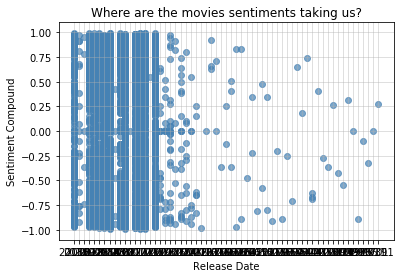

In [10]:
plt.scatter(df_sentiment_analytics["Year Month"], df_sentiment_analytics["sentiment comp"], color="steelblue", alpha=0.7,marker="o")
plt.grid(True, alpha=0.5)
plt.title("Where are the movies sentiments taking us?")
plt.xlabel("Release Date")
plt.ylabel("Sentiment Compound")
plt.ylim(-1.1,1.1)
#plt.xlim("201709", "201809")